In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('rock.csv')

In [3]:
df.head()

,name,album,artist,release_date,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Purple Haze,Are You Experienced,Jimi Hendrix,1967-05-12,69,0wJoRiX5K5BxlqZTolB2LD,0.533,0.905,2,-5.270,1,0.0754,0.00876,0.578000,0.0698,0.486,108.900,170813,4
1,Born To Be Wild - Single Version,Steppenwolf,Steppenwolf,1968-01-01,66,3lN8PP6R2IxbLP05QpYXng,0.439,0.734,2,-12.168,1,0.0970,0.26200,0.333000,0.2440,0.540,145.703,212893,4
2,"Oh, Pretty Woman","Oh, Pretty Woman",Roy Orbison,1962,71,48i055G1OT5KxGGftwFxWy,0.619,0.603,9,-9.481,1,0.0342,0.71200,0.000000,0.0721,0.958,127.433,178933,4
3,The Weight - Remastered,Music From Big Pink (Expanded Edition),The Band,1968-07-01,0,0sDqo9UPzPUtu9wEkI3zRB,0.630,0.519,9,-10.997,1,0.0528,0.22500,0.000004,0.0974,0.502,143.942,278627,4
4,Hey Jude - Remastered 2015,1 (Remastered),The Beatles,2000-11-13,72,0aym2LBJBk9DAYuHHutrIl,0.386,0.607,10,-7.700,1,0.0261,0.01120,0.000014,0.0880,0.532,147.207,425653,4


In [4]:
df.shape

(528, 19)

In [20]:
# audio_feature_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
#                           'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# plt.figure()
# for idx, feature in enumerate(audio_feature_cols):
#     plt.subplot(5,4,idx+1)
#     plt.hist(df[feature])
#     plt.title(feature)

# plt.show()

<AxesSubplot:xlabel='popularity', ylabel='Count'>

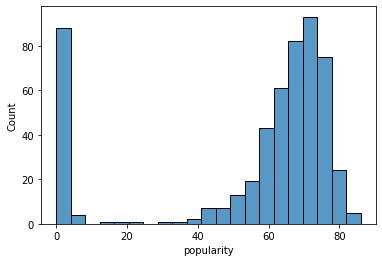

In [21]:
sb.histplot(data=df['popularity'])

<AxesSubplot:xlabel='danceability', ylabel='Count'>

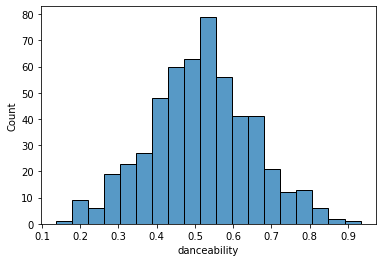

In [22]:
sb.histplot(data=df['danceability'])

<AxesSubplot:xlabel='energy', ylabel='Count'>

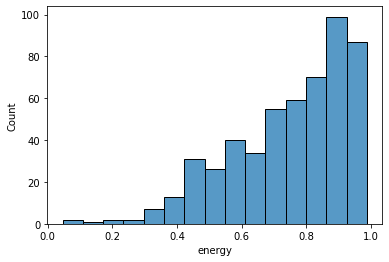

In [23]:
sb.histplot(data=df['energy'])

<AxesSubplot:xlabel='loudness', ylabel='Count'>

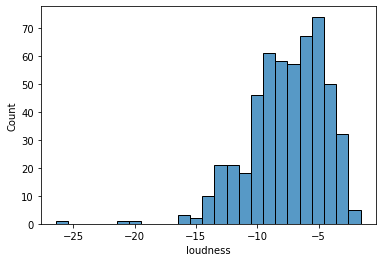

In [24]:
sb.histplot(data=df['loudness'])

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

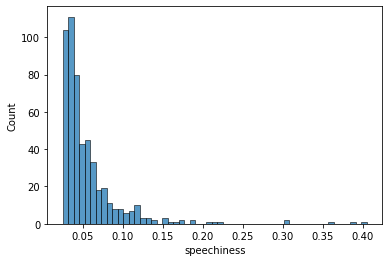

In [25]:
sb.histplot(data=df['speechiness'])

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

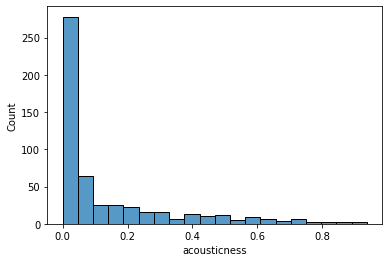

In [26]:
sb.histplot(data=df['acousticness'])

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

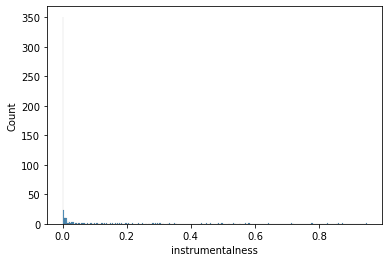

In [27]:
sb.histplot(data=df['instrumentalness'])

<AxesSubplot:xlabel='liveness', ylabel='Count'>

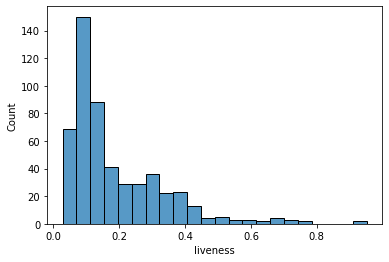

In [28]:
sb.histplot(data=df['liveness'])

<AxesSubplot:xlabel='valence', ylabel='Count'>

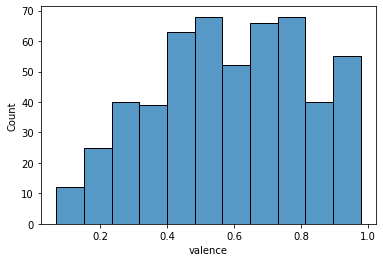

In [29]:
sb.histplot(data=df['valence'])

<AxesSubplot:xlabel='tempo', ylabel='Count'>

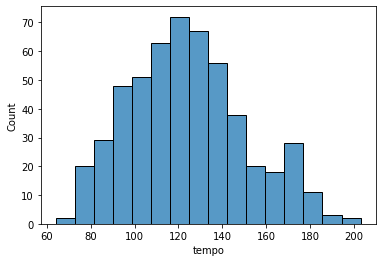

In [30]:
sb.histplot(data=df['tempo'])

<AxesSubplot:xlabel='duration_ms', ylabel='Count'>

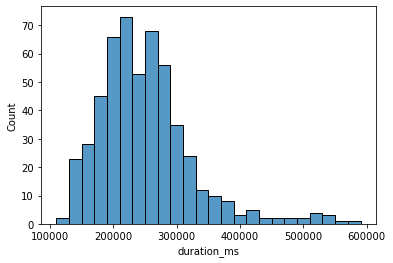

In [31]:
sb.histplot(data=df['duration_ms'])

In [7]:
def clean_df(dropped_cols):
    years = []
    for date in df['release_date']:
        years.append(int(date[:4]))

    df['year'] = years
    
    return df.drop(dropped_cols, axis=1)

In [8]:
def get_vector(df_cont, track_id):
    track_df = df_cont.loc[df_cont['id'] == track_id]
    return track_df.drop(['id'], axis=1).to_numpy().reshape(-1,)

In [9]:
"""
Recommends a given number of songs that are similar to a given song.

:param given_track_id: the ID of the track that should be used for the basis of recommendations
:param num_tracks: the number of similar sogns that should be returned
:returns: a list of songs names that are similar to the given song
:precondition: The given track ID must be contained in the dataframe of song attributes.
"""
def recommend_songs(df, given_track_id, num_tracks, dropped_cols):
    df_cont = clean_df(dropped_cols)
    
    given_track_array = get_vector(df_cont, given_track_id)
    
    track_distances = []

    for index in range(len(df_cont)):
        track = df_cont.iloc[index]
        track_array = get_vector(df_cont, track['id'])
        euclid_dist = np.linalg.norm(given_track_array - track_array)
        track_distances.append((track['id'], euclid_dist))

    sorted_tracks = sorted(track_distances, key=lambda x: x[1])
    
    rec_songs = []
    for index in range(num_tracks):
        song_df = df[df['id']==sorted_tracks[index+1][0]]
        rec_song = (song_df.iloc[0]['name'], song_df.iloc[0]['id'])
        rec_songs.append(rec_song)
    
    return rec_songs

In [13]:
def get_ids(rec_songs):
    ids_list = []
    for song in rec_songs:
        ids_list.append(song[1])
    
    return ids_list

In [30]:
def plot_closeness(df, given_song_id, rec_songs_id, dims):
    df_dims = df[dims+['id']]
    
    given_row = df_dims.loc[df_dims['id']==given_song_id]
    given_point = (given_row.iloc[0][dims[0]], given_row.iloc[0][dims[1]])
    
    rec_points = []
    
    for song in rec_songs_id:
        row = df_dims.loc[df_dims['id']==song]
        point = (row.iloc[0][dims[0]], row.iloc[0][dims[1]])
        rec_points.append(point)
    
    rec_x = [point[0] for point in rec_points]
    rec_y = [point[1] for point in rec_points]
    
    df_other = df_dims[~df_dims['id'].isin(rec_songs_id)]
    points = []
    
    for index in range(len(df_other)):
        point = (df_other.iloc[index][0], df_other.iloc[index][1])
        points.append(point)
    
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    
    plt.figure()
    plt.scatter(x, y)
    plt.scatter(rec_x, rec_y, c='orange')
    plt.scatter(given_point[0], given_point[1], c='red')
    plt.show()

In [ ]:
# for reference
continuous_features_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                          'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'popularity']

In [ ]:
dropped_cols = ['name', 'artist', 'album', 'key', 'mode', 'time_signature', 'release_date']

In [44]:
df[df['name']=='Hit Me With Your Best Shot']

,name,album,artist,release_date,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
241,Hit Me With Your Best Shot,Crimes Of Passion,Pat Benatar,1980-08-05,70,0vOkmmJEtjuFZDzrQSFzEE,0.741,0.58,4,-9.05,1,0.0304,0.117,0.000033,0.212,0.944,127.402,171267,4,1980


In [45]:
rec_songs = recommend_songs(df, '0vOkmmJEtjuFZDzrQSFzEE', 5, dropped_cols)
print(rec_songs)

[('What I Got', '7lksFyVBmmkYBTVQcxnvC3'), ('First Date', '1fJFuvU2ldmeAm5nFIHcPP'), ('Purple Haze', '0wJoRiX5K5BxlqZTolB2LD'), ('Itchycoo Park', '0fYgtNCNCjFDeJWTIMukNU'), ('My Own Worst Enemy', '39sICagGOiysHxoIBRyLLi')]


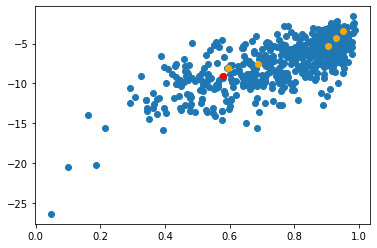

In [46]:
plot_closeness(df, '0vOkmmJEtjuFZDzrQSFzEE', get_ids(rec_songs), ['energy', 'loudness'])